In [23]:
#start with - data_cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

taxi=pd.read_csv('datas.csv')
taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,Lpep_dropoff_datetime
0,2,2018-01-01 00:38:02,2018-01-01 00:55:02,N,1,189,225,5,3.45,14.5,0.5,0.5,3.16,0.0,0.3,18.96,1,1.0,2018-01-01 00:55:02
1,2,2018-01-01 00:57:59,2018-01-01 01:12:26,N,1,97,188,1,2.71,11.5,0.5,0.5,3.84,0.0,0.3,16.64,1,1.0,2018-01-01 01:12:26
2,2,2018-01-01 00:36:58,2018-01-01 00:51:08,N,1,244,75,2,6.01,19.0,0.5,0.5,4.00,0.0,0.3,24.30,1,1.0,2018-01-01 00:51:08
3,1,2018-01-01 00:07:40,2018-01-01 00:15:20,N,1,225,37,1,1.90,8.0,0.5,0.5,3.00,0.0,0.3,12.30,1,1.0,2018-01-01 00:15:20
4,1,2018-01-01 00:25:09,2018-01-01 00:42:04,N,1,36,145,2,4.30,15.5,0.5,0.5,3.35,0.0,0.3,20.15,1,1.0,2018-01-01 00:42:04


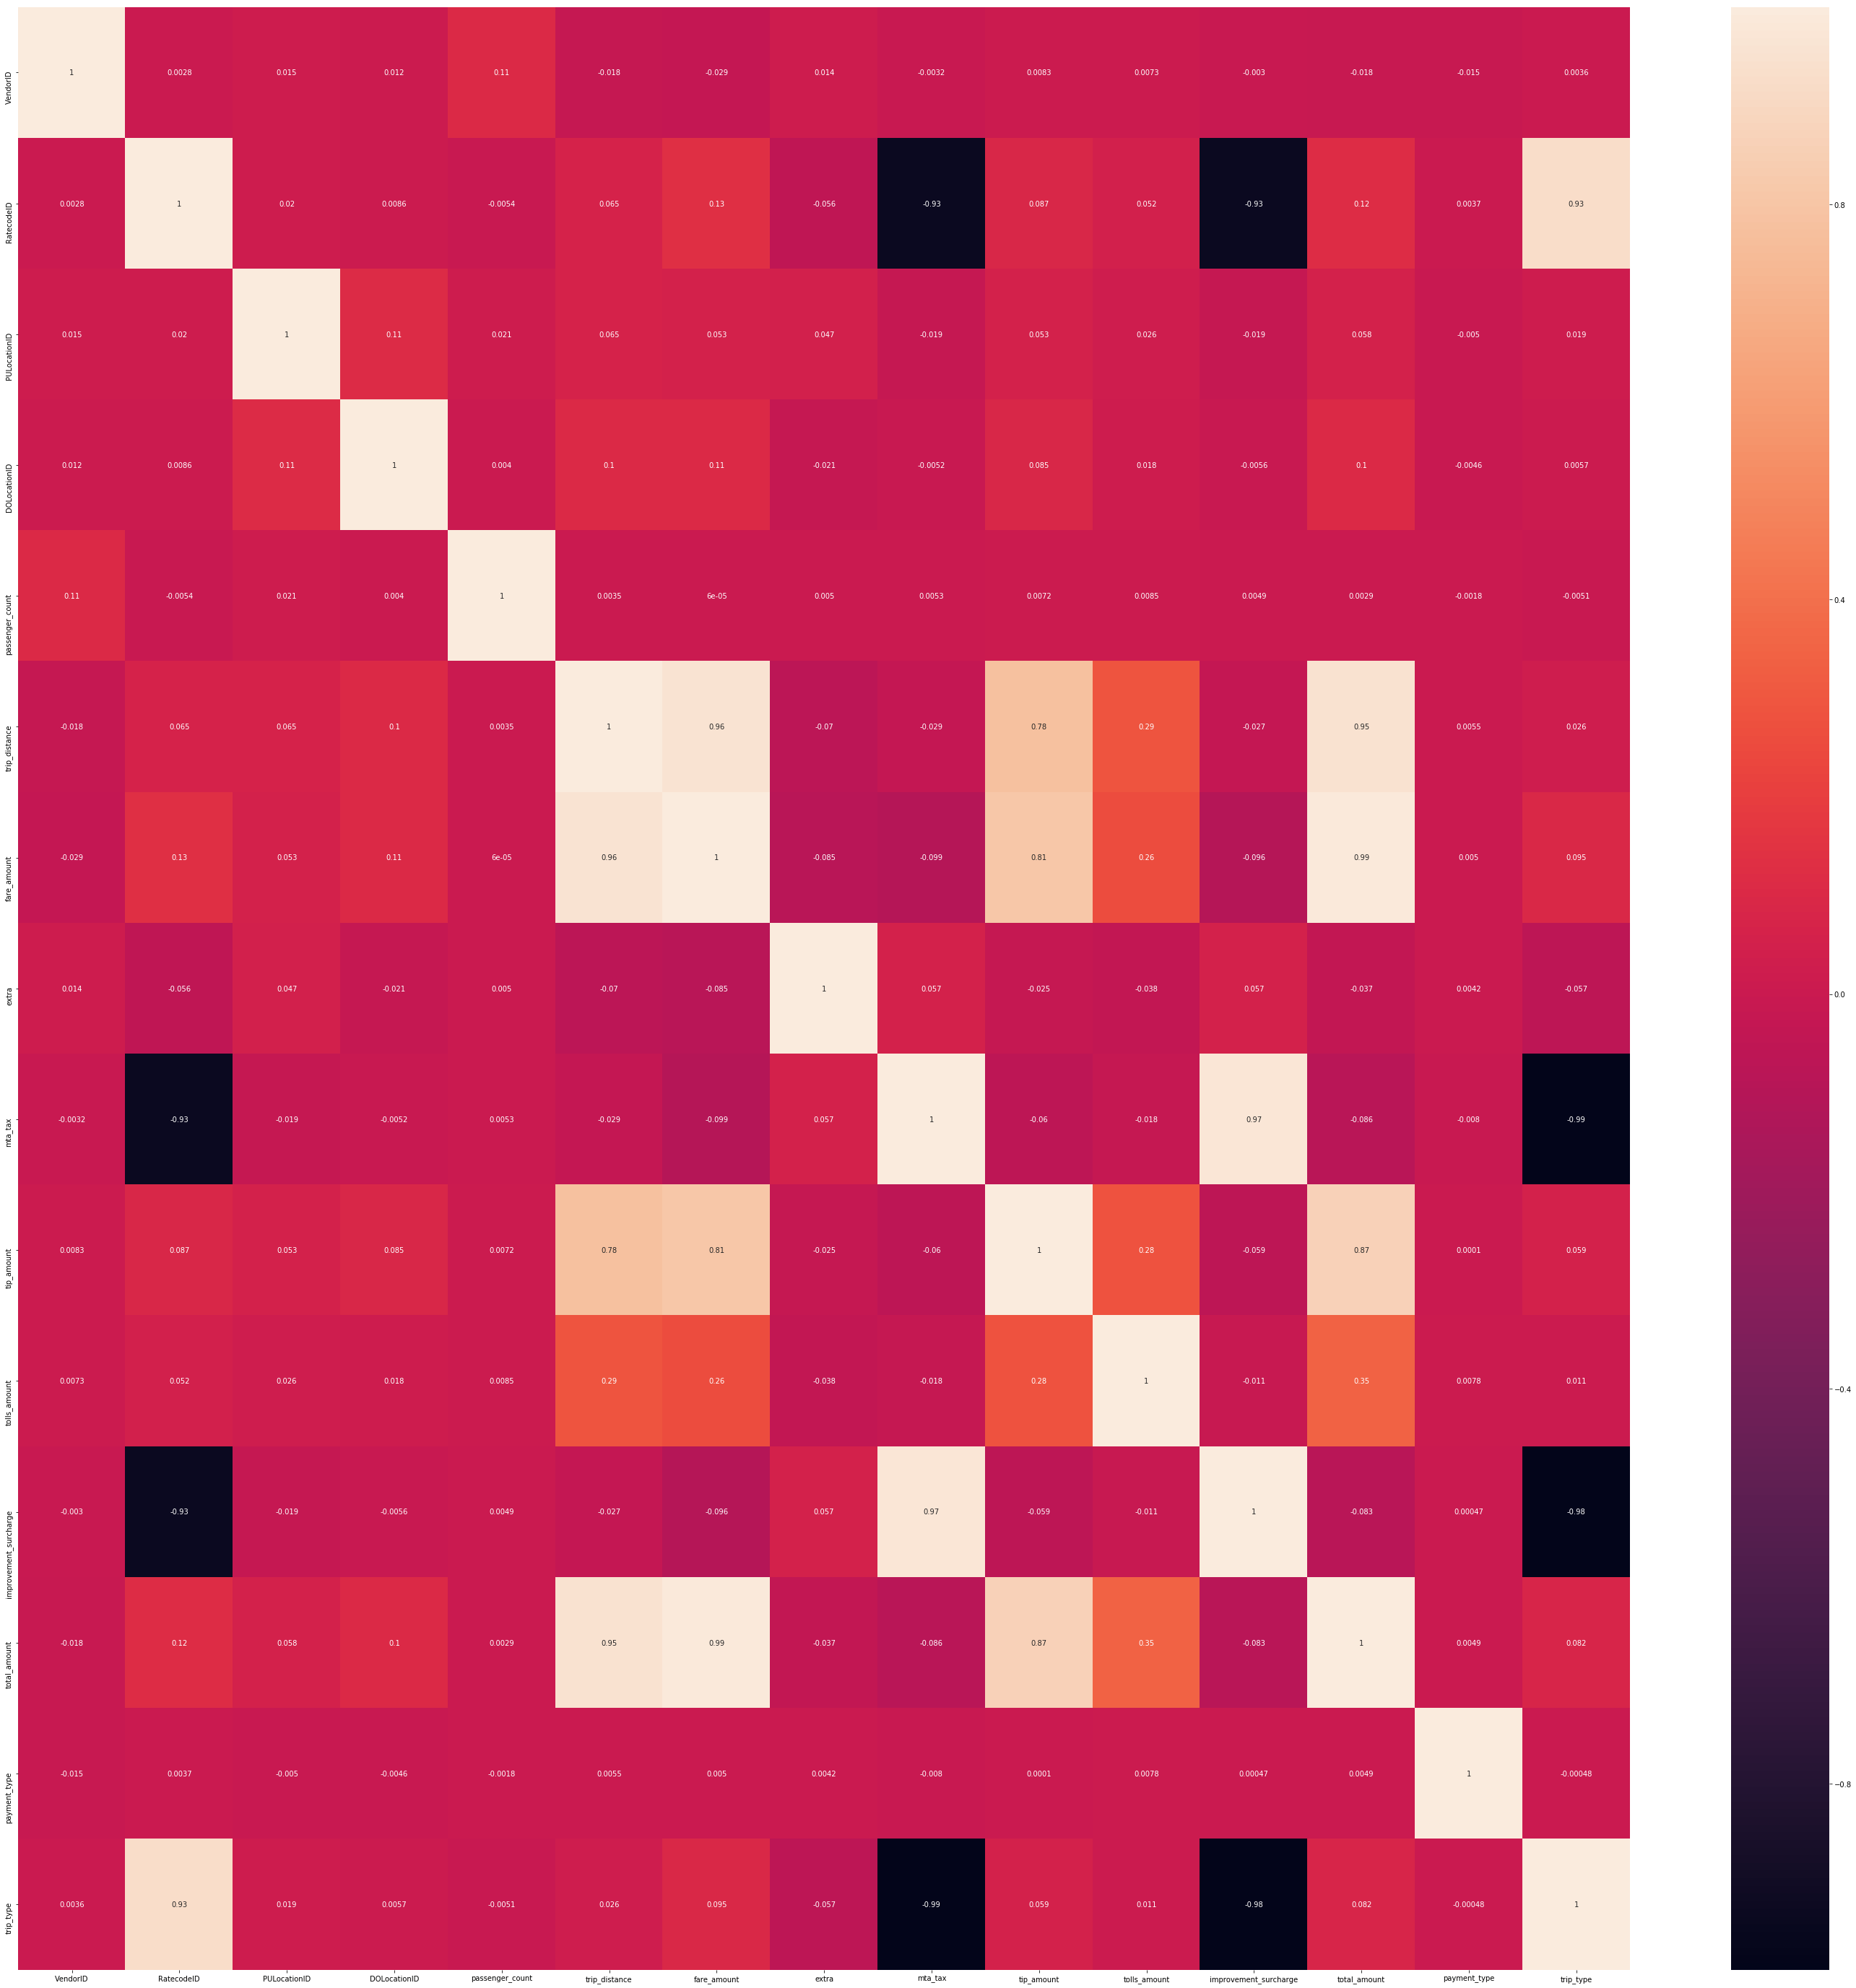

In [16]:
#make heat map of correlations (i didn't delete them!)
plt.figure(figsize=(50,50))
sns.heatmap(taxi.corr(), annot=True)
plt.show()
#we ought to delete one of two columns from black/white squares (strong correlation between them). 

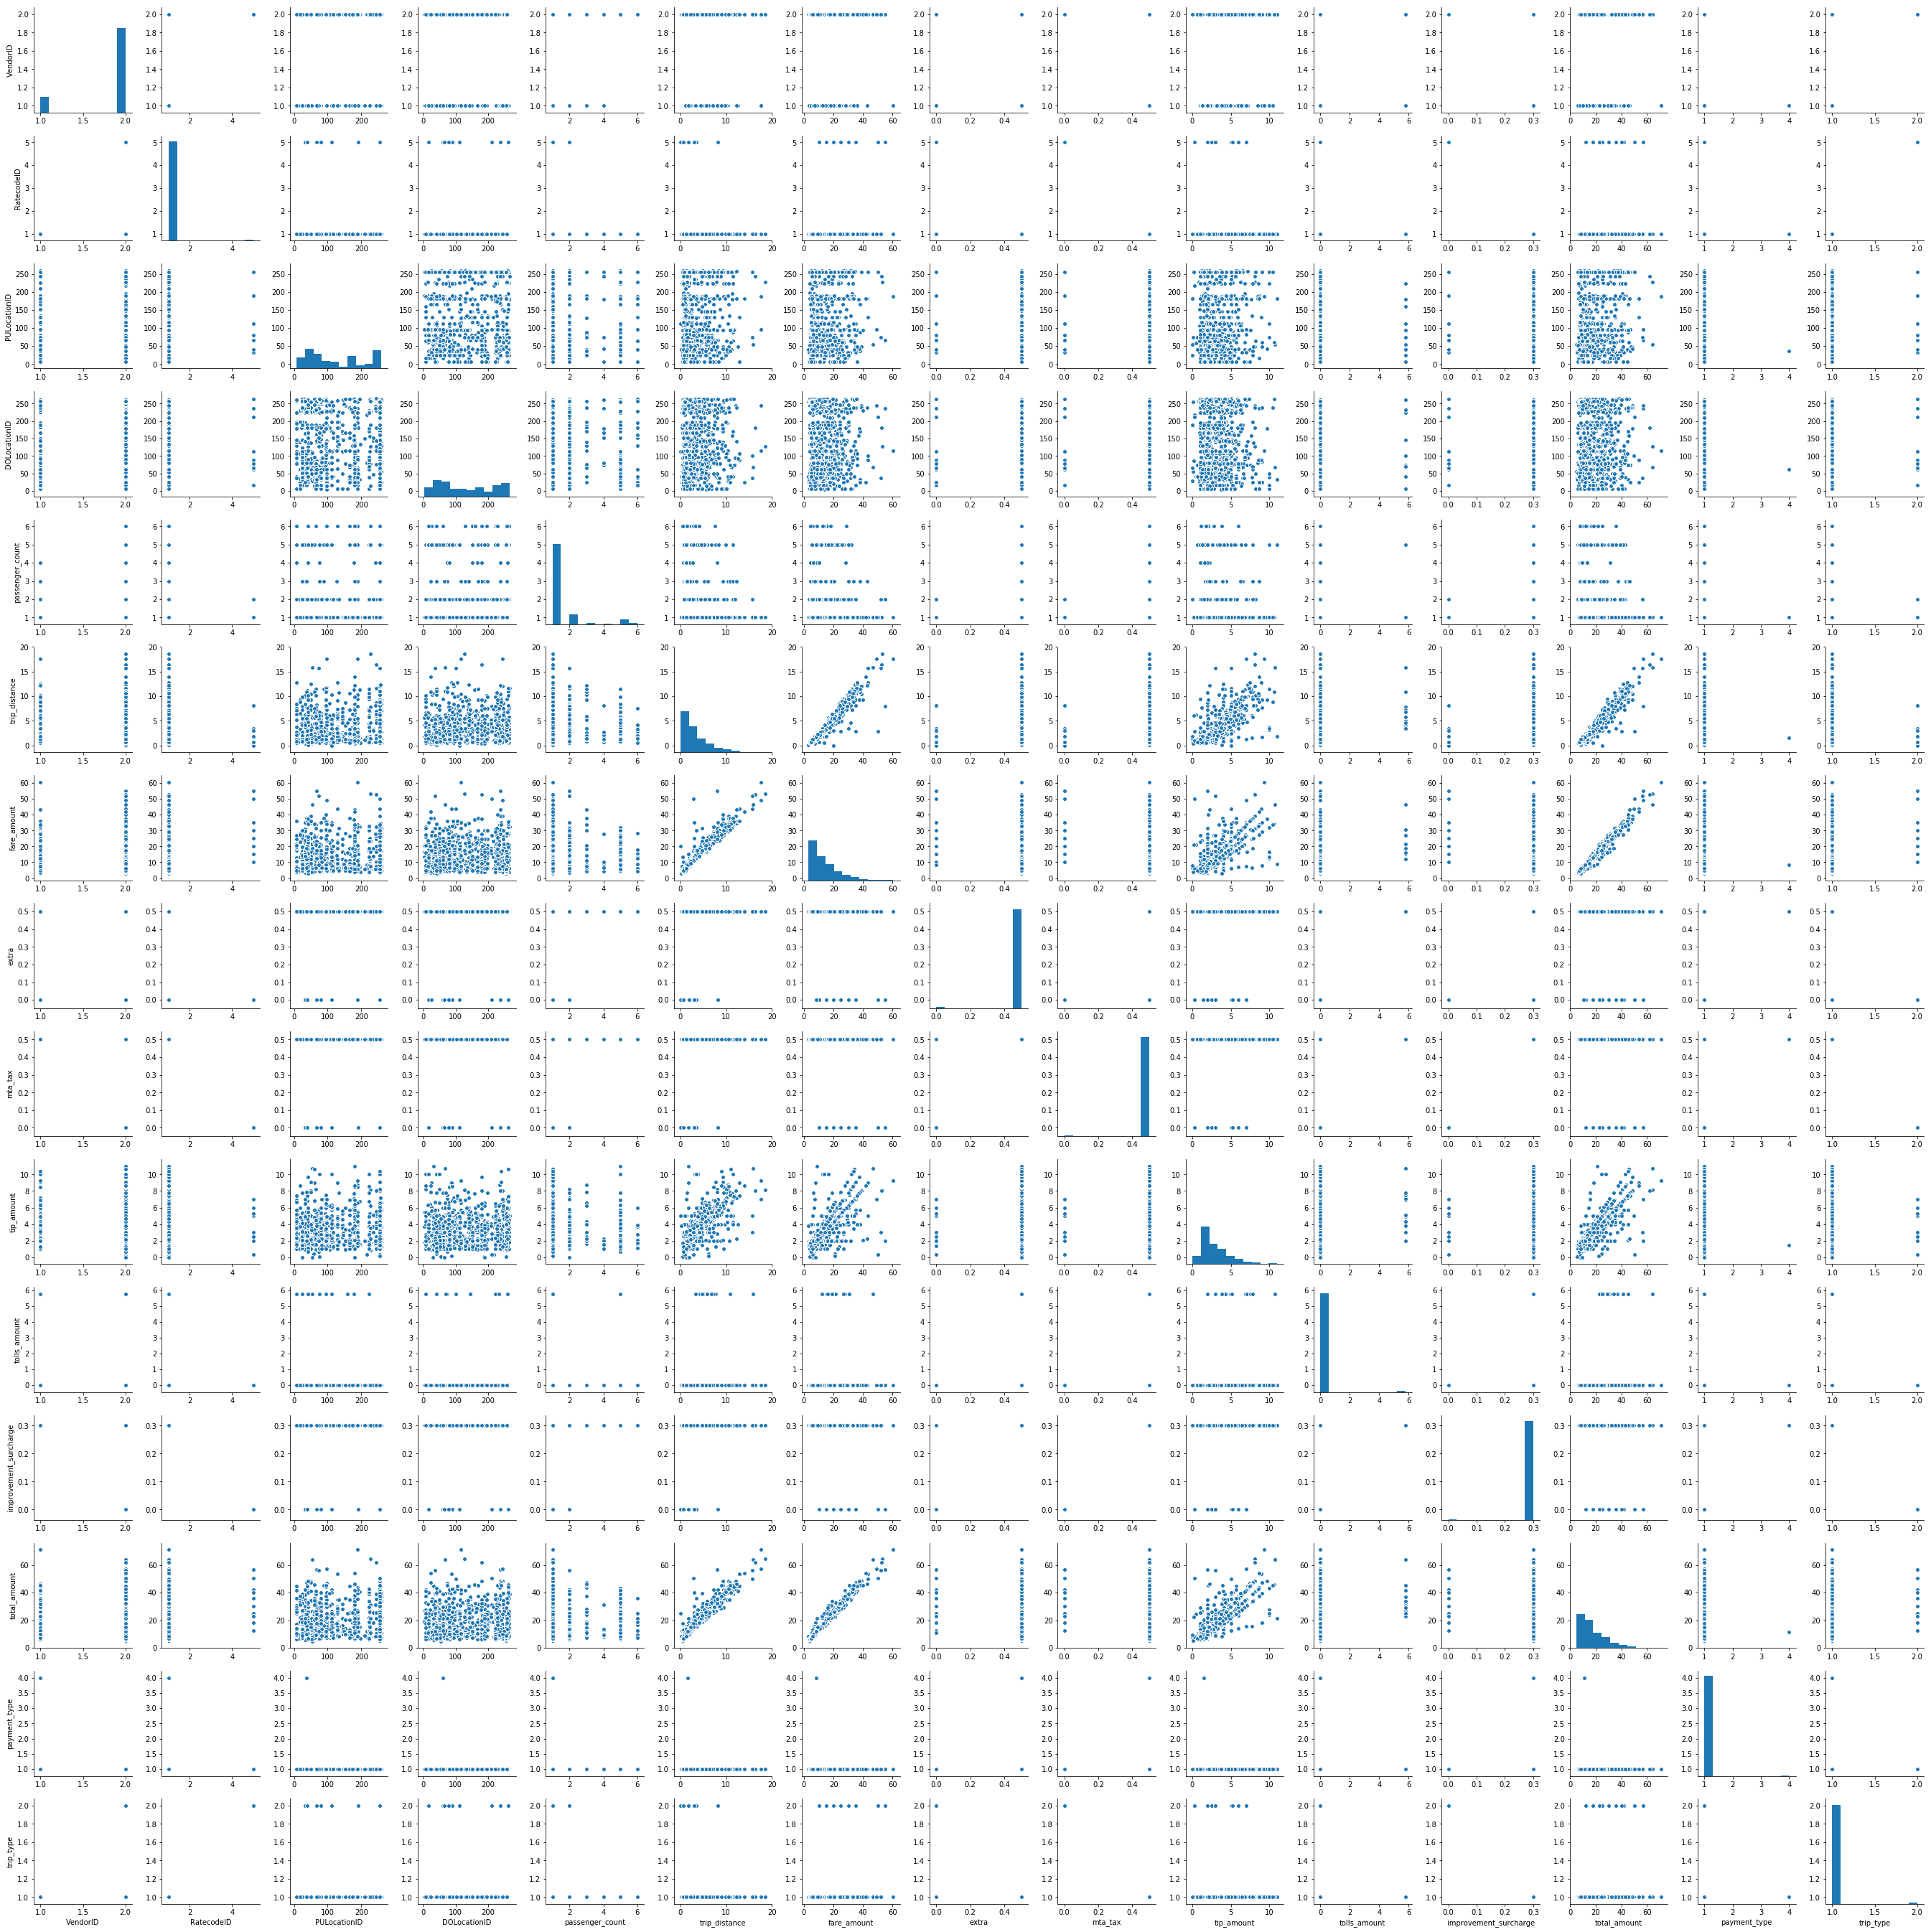

In [17]:
#multidimensional check - show all plots
small=taxi[:1000]
sns.pairplot(small)
plt.show()

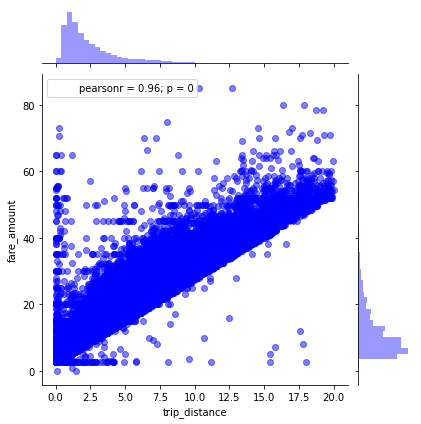

In [18]:
sns.jointplot(taxi['trip_distance'], taxi['fare_amount'], alpha=0.5, color='blue')
plt.show()
#yes, we have correlation - pearsonr = 0.96 and, hey, look at the plot!
#we should delete one of this column

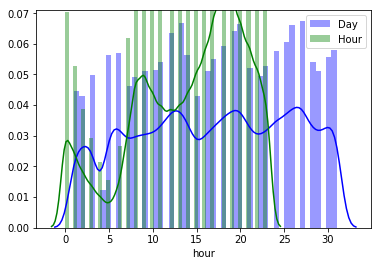

In [43]:
#time
#f, axes=plt.subplots(2, 2, figsize(2, 2), sharex=True)
taxi["lpep_pickup_datetime"] = pd.to_datetime(taxi["lpep_pickup_datetime"])
taxi["lpep_dropoff_datetime"] = pd.to_datetime(taxi["lpep_dropoff_datetime"])
taxi['year'] = taxi.lpep_pickup_datetime.dt.year
taxi['month'] = taxi.lpep_pickup_datetime.dt.month
taxi['day'] = taxi.lpep_pickup_datetime.dt.day
taxi['weekday'] = taxi.lpep_pickup_datetime.dt.weekday
taxi['hour'] = taxi.lpep_pickup_datetime.dt.hour

sns.distplot(taxi['day'], color='blue', label="Day")
sns.distplot(taxi['hour'], color='green', label="Hour")
plt.legend()
plt.show()